# 모두를 위한 RL 강좌
- pygame을 쓴다!?

In [8]:
import gym
env = gym.make('FrozenLake-v1')
observation = env.reset()
for _ in range(30):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(observation, reward, done, info)

1 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
4 0.0 False {'prob': 0.3333333333333333}
4 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
4 0.0 False {'prob': 0.3333333333333333}
4 0.0 False {'prob': 0.3333333333333333}
4 0.0 False {'prob': 0.3333333333333333}
5 0.0 True {'prob': 0.3333333333333333}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 0 True {'prob': 1.0}
5 

## Optimal Policy, $\pi$ and Max $Q$
$*$  = optimal
$$
Q(\text{state}, \text{action}) \\
\\
\text{Max} Q = \max_{a'} Q(s, a') \\
\pi^*(s) = \argmax_{a} Q(s, a)
$$
### rewards

$s_0, a_0, r_1, s_1, a_1, r_2, ..., s_{n-1}, a{n-1}, r_n, s_n$

$$\begin{aligned}
R &= r_1 + r_2 + ... + r_n \\
R_t &= r_t + r_{t+1} + ... + r_{n} \\
R_t &= r_t + R_{t+1} \\
\\
R^*_t &= r_t + \max R_{t+1} \\
\\
Q(s, a) &\approx r + \max_{a'} Q(s', a') \\
\hat{Q}(s,a) &\leftarrow r + \max_{a'} \hat{Q}(s', a')
\end{aligned}$$

## Dummy Q-learning algotrithm
- For each $s, a$ initialize table entry $\hat{Q}(s, a) \rightarrow 0$
- Observe current state $s$
- Do forever:
    - Select an action $a$ and execute it
    - Receive immediate reward $r$
    - Observe the new state $s'$
    - Update the table entry for $\hat{Q}(s, a)$ as follows:
        - $$\hat{Q}(s, a) \rightarrow r + \max_{a'} \hat{Q}(s', a')$$
    - $s \rightarrow s'$

success rate: 0.798
final Q-table values
LEFT	DOWN	RIGHT	UP
[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.43046721 0.4782969 ]
 [0.4782969  0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


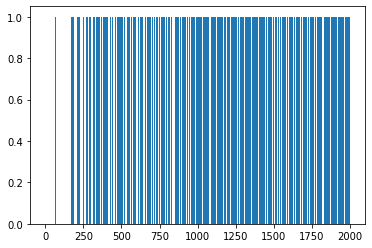

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random as pr
import gym
from gym.envs.registration import register

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(
    id = 'FrozenLake-v3', 
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv', 
    kwargs = {'map_name' : '4x4', 
              'is_slippery' : False}
)

env = gym.make('FrozenLake-v3')
# initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# set learning parameters
num_episodes = 2000
discount = 0.9

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # decaying var
    e = 1. / ((i // 100) + 1)
    
    # the Q-table learning algorithm
    while not done:
        # decaying e-greedy
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        # first run
        # action = rargmax(Q[state, :])
        
        # add random noise
        # action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        # get new state and reward from environment
        new_state, reward, done, _ = env.step(action)
        
        # update Q-table with new knowledge using learning rate
        Q[state, action] = reward + discount * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
    rList.append(rAll)
# print(Q)

print(f'success rate: {str(sum(rList) / num_episodes)}')
print('final Q-table values')
print('LEFT\tDOWN\tRIGHT\tUP')
print(Q)
plt.bar(range(len(rList)), rList)
plt.show()

## Exploit vs. Exploration
- exploit은 알려진 정보만을 사용, exploration은 다 한번 가본다.

### E-greedy
- 주사위를 던진다.
```
e = 0.1
if rand < e:
    a = random
else:
    a = argmax(Q(s, a))
```
### decaying E-greedy
- 학습 할 수록 exploit쪽으로 간다.
```
for i in range(1000):
    e = 0.1 / (i + 1)
    if rand < e:
        a = random
    else:
        a = argmax(Q(s, a))
```

### add random noise
- Q 테이블에 랜덤값을 더한 다음 exploit 한다.
- decaying을 더하면, 학습 할 수록 랜덤 폭을 줄인다.

## Learning $Q(s, a)$ with discounted reward
- 최단거리를 구하기 위함. 보상을 빨리 받는게 좋다.
- 미래의 리워드를 디스카운트 해버린다.
    - $\gamma = 0.9$ 감마를 곱해준다.

$$\begin{aligned}
\hat{Q}(s, a) \rightarrow r + \gamma \times \max_{a'} \hat{Q}(s', a') \\

\end{aligned}$$

$$\begin{aligned}
R &= r_1 + r_2 + ... + r_n \\
R_t &= r_t + r_{t+1} + ... + r_{n} \\
\\
R_t &= r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + ... + \gamma^{n-t} r_n \\
&= r_t + \gamma(r_{t+1} + \gamma r_{t+2} + ...) \\
&= r_t + \gamma R_{t+1} \\
\\
R^*_t &= r_t + \gamma \max R_{t+1} \\
\end{aligned}$$